# Проект по анализу данных


Горбовцова Ксения  
ИУ5-24М



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


В качестве набора данных будем использовать датасет с платформы Kaggle (insurance)  
Описание данных:   
1) Age - возраст     
2) bmi - индекс массы тела (рассчитывается как отношение массы к квадрату роста человека)  
3) Дети - количество детей (которые должны быть покрыты страховкой)  
4) Курение - Является ли человек курильщиком или нет  
5) Sex - пол человека (женский/мужской)   
6) Region - округ, в котором живет человек  
7) Charges - стоимость медицинской страховки  

Будем решать задачу регрессии, предсказывая стоимость страховки в зависимости от других факторов

Посмотрим, что представлено в данных

In [0]:
from google.colab import drive
drive.mount('/MMO')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /MMO


In [0]:
data=pd.read_csv("/MMO/My Drive/insurance.csv")

In [0]:
data.shape

(1338, 7)

In [0]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


В датасете нет пропущенных значений, поэтому шаг с восстановлением данных и удалением пропускаем

Проверим корреляцию между признаками

In [0]:
corr = data.corr(method="pearson")

In [0]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Построим тепловую карту корреляции для более наглядного представления

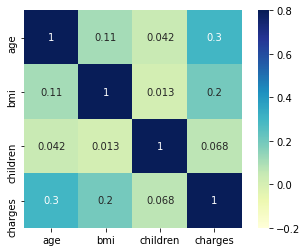

In [0]:
sns.heatmap(corr, square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

Графы Sex, Region и smoker не являются числовыми, поэтому они не включены в корреляционную матрицу. Признаки Sex и Smoker - бинарные, поэтому можно произвести кодировку бинарных признаков

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex)
data['sex'] = le.transform(data.sex)
le.fit(data.region)
data['region'] = le.transform(data.region)
le.fit(data.smoker)
data['smoker'] = le.transform(data.smoker)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [0]:
corr = data.corr(method="pearson")
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


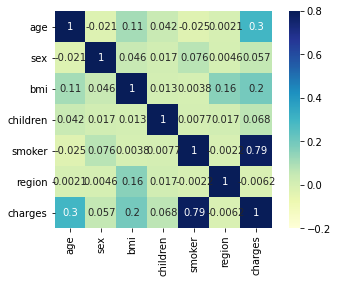

In [0]:
sns.heatmap(corr, square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

Построим графики, чтобы понять структуру данных

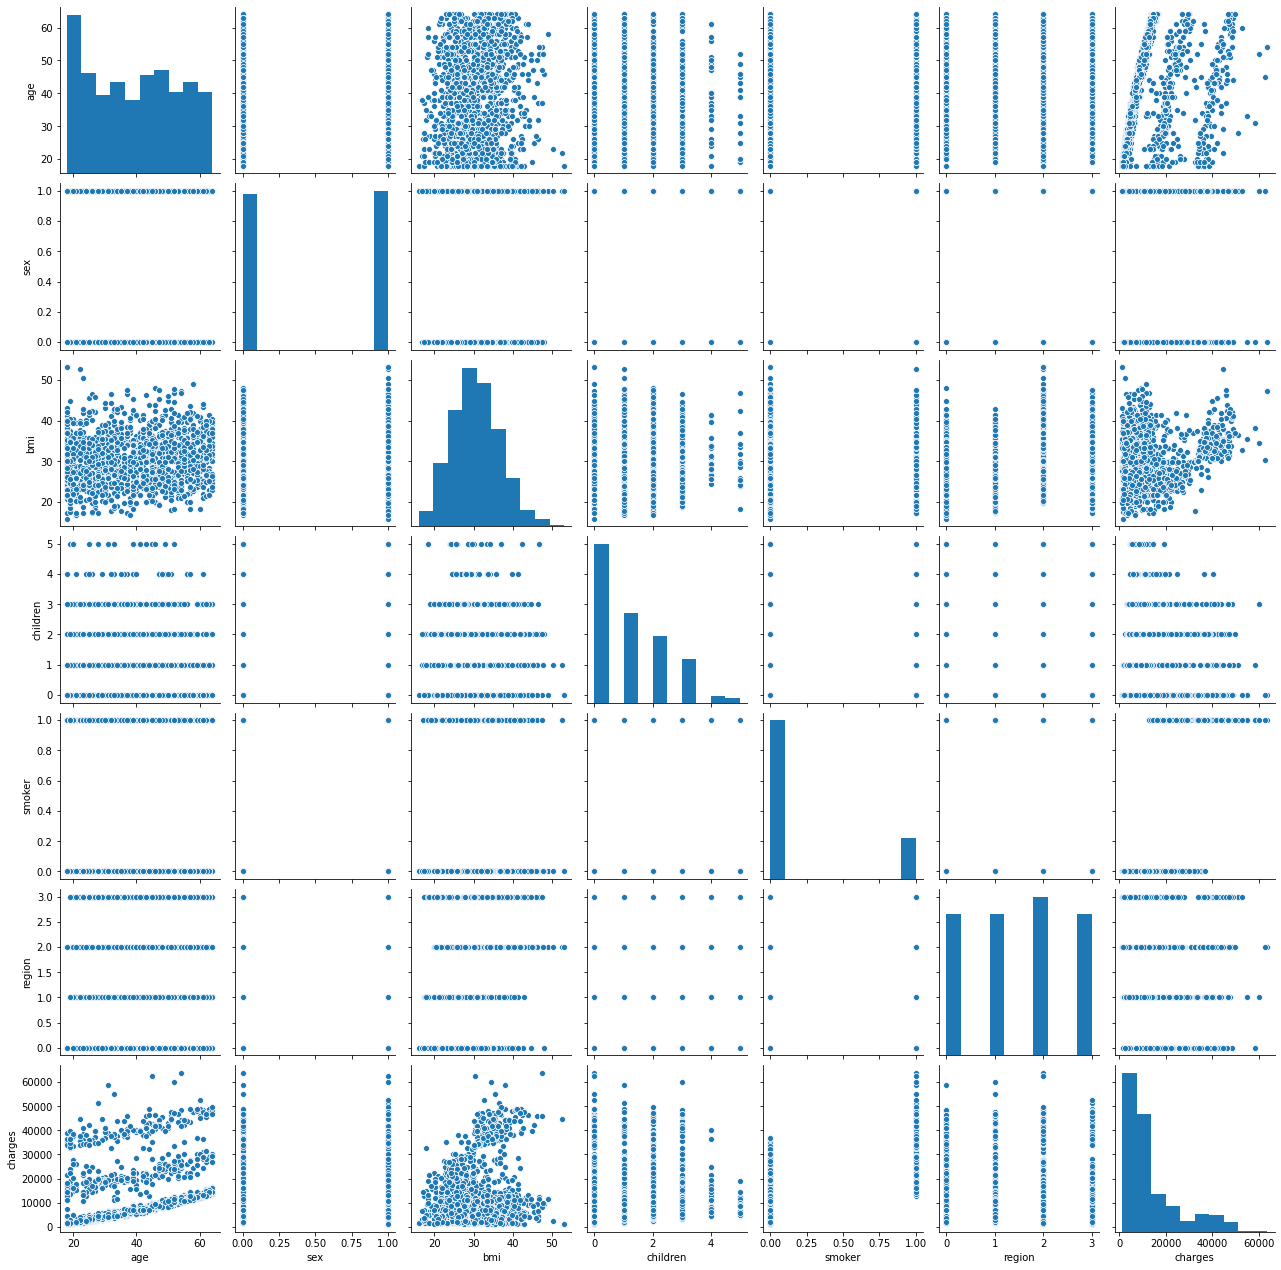

In [0]:
sns.pairplot(data)

Судя по корреляционной матрице мы можем решать задачу регрессии для предсказания стоимости страховки. При этом пол и регион проживания являются абсолютно не значимыми данными, поэтому ими можно пренебречь

In [0]:
data = data.drop(['sex', 'region'], axis=1)
data

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


## Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации  
Cредняя квадратичная ошибка - измеряет среднее из квадратов ошибок , то есть, средний квадрата разность между оцененным ценности и то , что оценивается.  
Средняя абсолютная ошибка - мера разности между двумя непрерывными переменными.  
Коэффициент детерминации - статистическая мера согласия, с помощью которой можно определить, насколько уравнение регрессии соответствует реальным данным.


In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [0]:
target = data['charges']
data = data.drop(['charges'], axis=1)

## Модели

В качестве моделей регрессии выберем модель Ridge, KneighborsRegressor и ансамблевую модель GradientBoostingRegressor  
Ridge - модель реализует регрессионную модель, где функция потерь - это линейная функция наименьших квадратов, а регуляризация задается l2-нормой.  
KneighborsRegressor - 
регрессия на основе k-ближайших соседей, прогнозируется локальной интерполяцией целей, связанных с ближайшими соседями в обучающем наборе.  
GradientBoostingRegressor - строит аддитивную модель поэтапно; это позволяет оптимизировать произвольные дифференцируемые функции потерь. На каждом этапе дерево регрессии соответствует отрицательному градиенту заданной функции потерь.

In [0]:
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing

Проведем нормализацию данных

In [0]:
data = preprocessing.scale(data)

## Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [0]:
X_train.shape, y_train.shape

((1070, 4), (1070,))

In [0]:
X_test.shape, y_test.shape

((268, 4), (268,))

## Базовое решение для всех моделей

In [0]:
def quality(test, predicted):
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mean_squared_error(test, predicted)))
    print("     Средняя абсолютная ошибка: "+ str(mean_absolute_error(test, predicted)))
    print("     Коэффициент детерминации: "+str(r2_score(test, predicted)))

In [0]:
models = [Ridge(), KNeighborsRegressor(), GradientBoostingRegressor()]
models

[Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False)]

Обучение модели Ridge
  Метрики качества:
     Средняя квадратичная ошибка: 35654890.04844849
     Средняя абсолютная ошибка: 4037.9531143137806
     Коэффициент детерминации: 0.7611552968853786
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 21908660.31691201
     Средняя абсолютная ошибка: 2590.3437283716416
     Коэффициент детерминации: 0.853238434842414
Обучение модели GradientBoostingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 18553165.947733704
     Средняя абсолютная ошибка: 2380.7973660628872
     Коэффициент детерминации: 0.8757161947042497


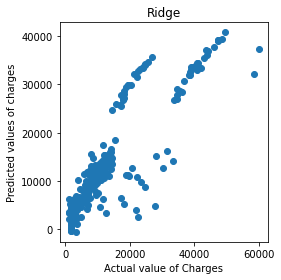

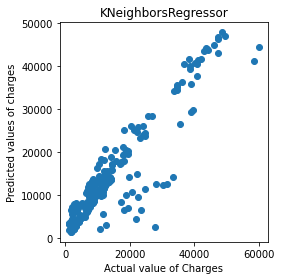

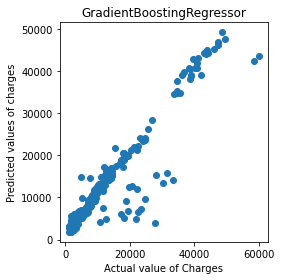

In [0]:
for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual value of Charges')
    plt.ylabel('Predicted values of charges')
    plt.tight_layout()
    quality(y_test, predicted)

## Подбор гиперпараметров моделей

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели Ridge

In [0]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7419894521514655
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


### Подбор параметров для KNeighborsRegressor

In [0]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
0.8280660614342764
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.5s finished


### Подбор параметров для GradientBoostingRegressor

In [0]:
grid_params={'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
}


grid = GridSearchCV(GradientBoostingRegressor(), grid_params, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...e,
                          

Обучение модели Ridge
  Метрики качества:
     Средняя квадратичная ошибка: 35654890.04844849
     Средняя абсолютная ошибка: 4037.9531143137806
     Коэффициент детерминации: 0.7611552968853786
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 24095253.54764786
     Средняя абсолютная ошибка: 2681.8263500793846
     Коэффициент детерминации: 0.8385909009328186
Обучение модели GradientBoostingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 18682840.31084518
     Средняя абсолютная ошибка: 2499.8129984146167
     Коэффициент детерминации: 0.874847533078401


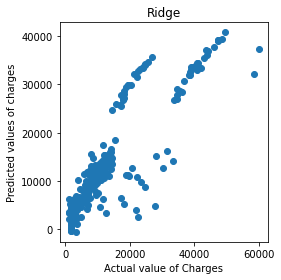

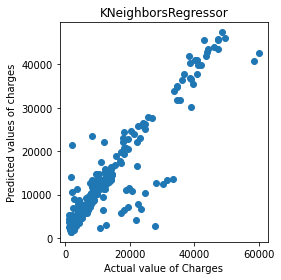

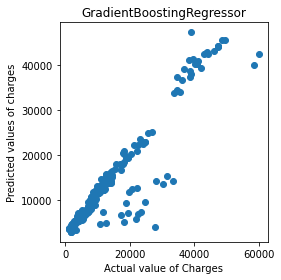

In [0]:
models = [Ridge(alpha=1), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)]

for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual value of Charges')
    plt.ylabel('Predicted values of charges')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась модель градиентного бустинга